In [1]:
%pylab inline
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.insert(0,'../..')

In [3]:
import omama as O # importing the Omama package


In [4]:
import pickle

In [5]:
with open('/raid/mpsych/datasetB_STAR.pkl','rb') as f:
    imgs = pickle.load(f)

In [7]:
for img in imgs:
    print(img.filePath)

/raid/data01/deephealth/dh_dcm_ast/2.25.101061596273797118379578161597667520568/DXm.2.25.196019876218144338833912653988519089450
/raid/data01/deephealth/dh_dcm_ast/2.25.101305069476490315601276636535835442733/DXm.2.25.187959266909957004435527232080131655286
/raid/data01/deephealth/dh_dcm_ast/2.25.101342675621179815626949670445106436415/DXm.2.25.156799870628027491452997435739216973699
/raid/data01/deephealth/dh_dcm_ast/2.25.101438132421818920818932745259868778815/DXm.2.25.110353053144484196646236383886655653667
/raid/data01/deephealth/dh_dcm_ast/2.25.101510617389074050971204475716091746407/DXm.2.25.135165624907069169803736429415703757935
/raid/data01/deephealth/dh_dcm_ast/2.25.101512619415929936467237556871105847065/DXm.2.25.228757218061276551299441733976634454315
/raid/data01/deephealth/dh_dcm_ast/2.25.102038761507494102693728350705541482458/DXm.2.25.13032401631218353207605391966361356572
/raid/data01/deephealth/dh_dcm_ast/2.25.102126456844651667571746834419150188377/DXm.2.25.161543991

DataLoader type is:  <class 'omama.omama_loader.OmamaLoader'>


/home/ryan.zurrin001/Projects/omama/_EXPERIMENTS/OUTLIER_DETECTION/../../omama/data_helper.py:137: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(pixels)


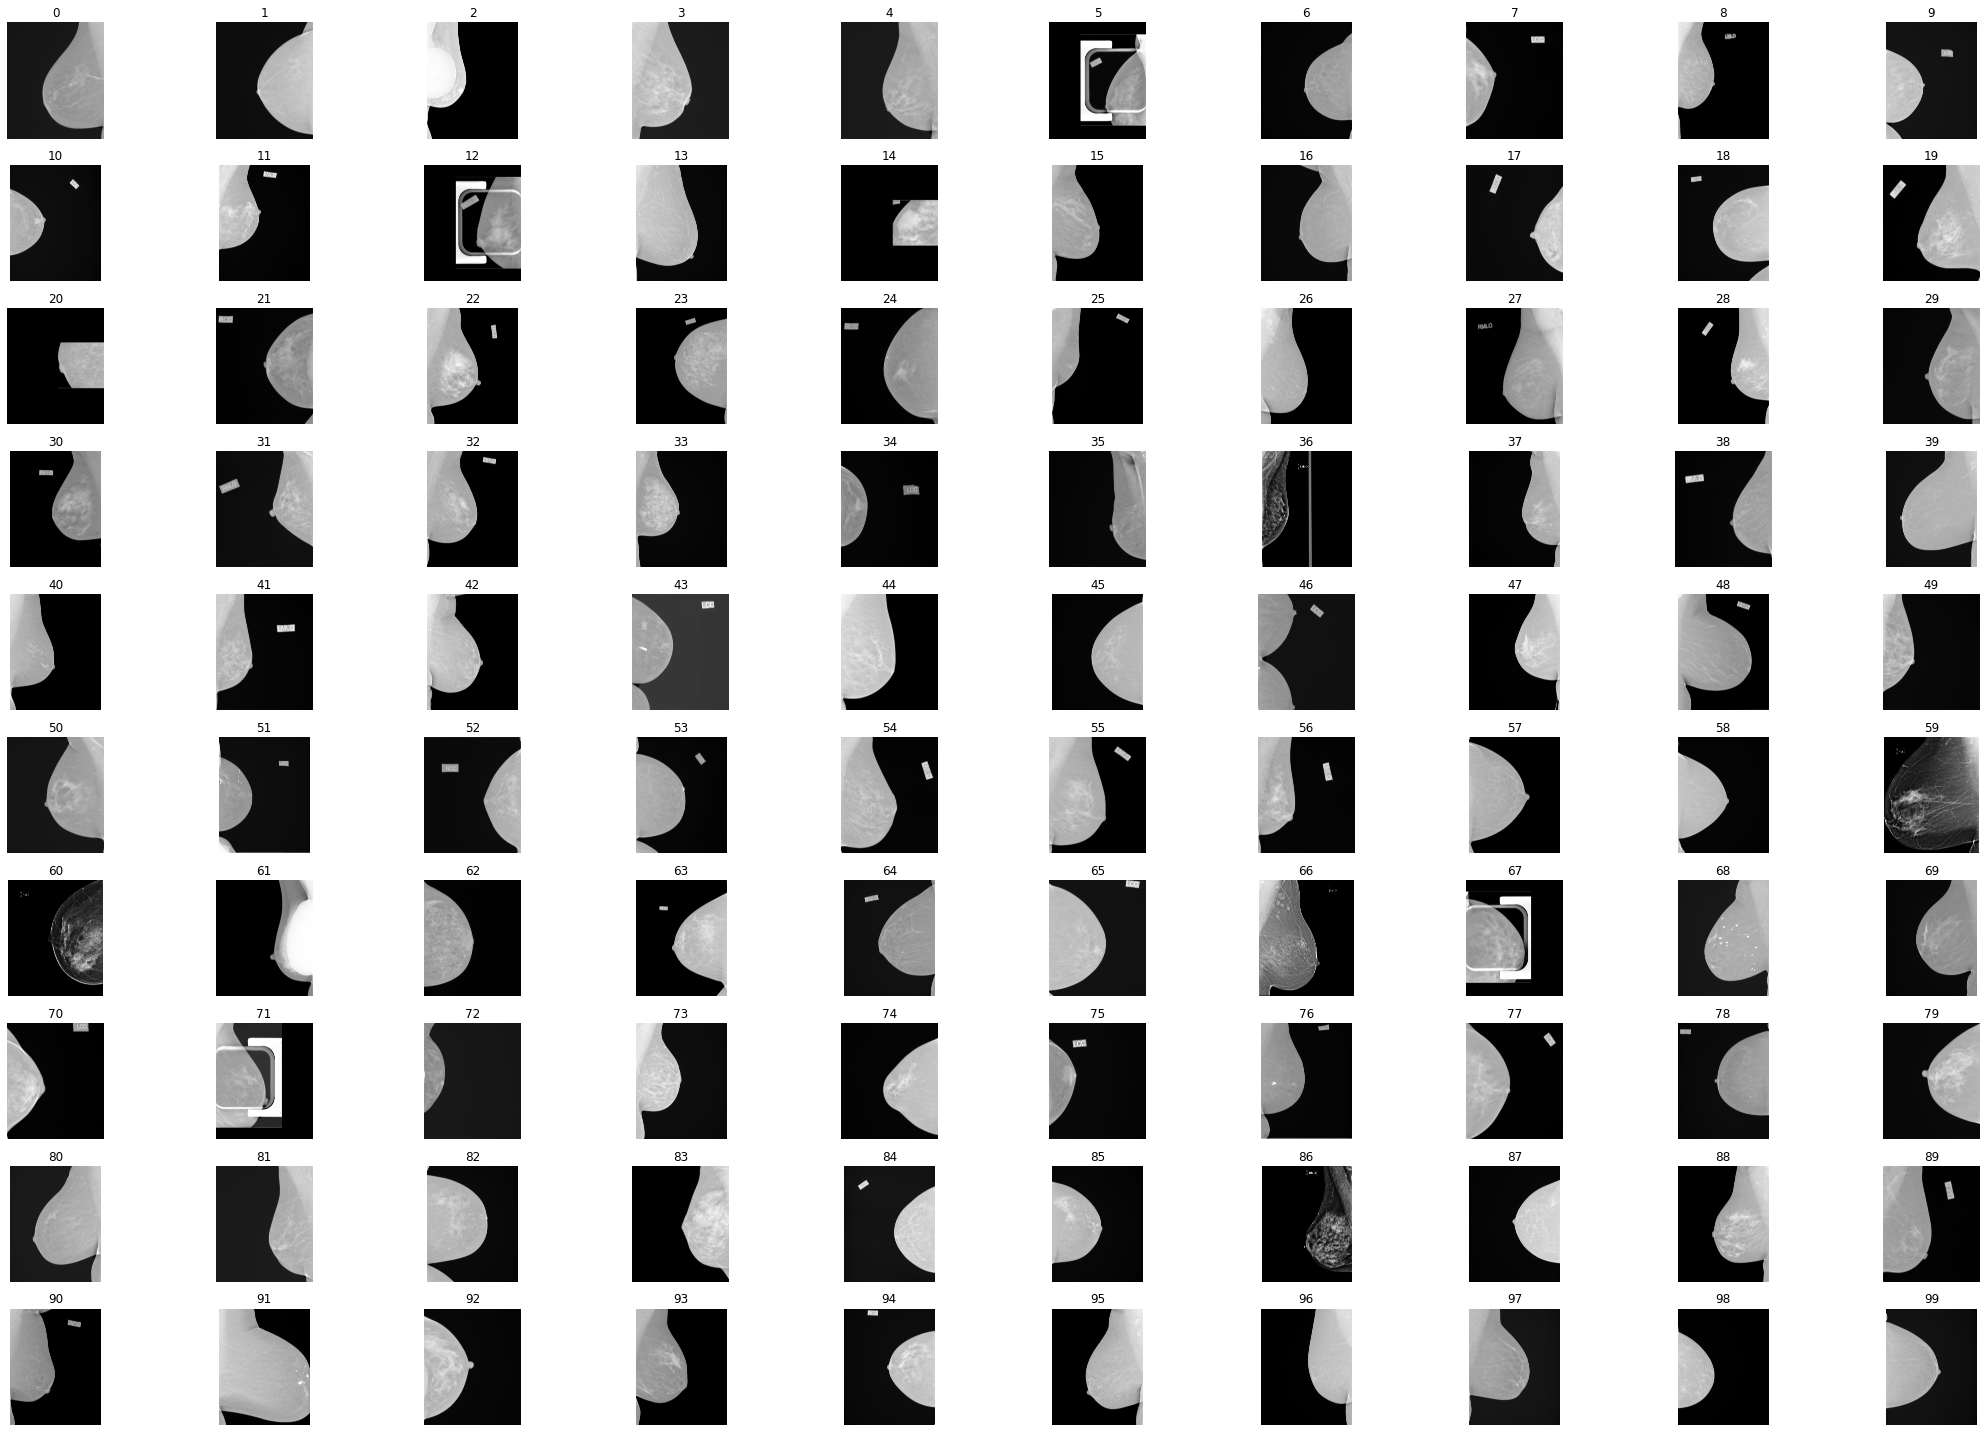

In [6]:
O.DataHelper.view_grid(imgs[:100], ncols=10, show_indices=True)

In [15]:
bad_images = '/raid/mpsych/cache_files/bad_image_sopuids_AB_star.txt'
bad_images = O.DataHelper.file_to_list(bad_images)

bad_indices = [0]*1000
for i,img in enumerate(imgs):
    if img.SOPInstanceUID in bad_images:
        print("found match ", img.SOPInstanceUID)
        bad_indices[i] = 1


found match  2.25.228757218061276551299441733976634454315
found match  2.25.186938390377702864424878266453617783452
found match  2.25.104741570434286601024640599915765944050
found match  2.25.34919021644207829746627699381007948801
found match  2.25.102787927621950466899113393315058524090
found match  2.25.148447723650642804858464400233497035468
found match  2.25.326402327641003469188024101690905287801
found match  2.25.213598039054484838606361554814505219338
found match  2.25.300214680560415838318196660239364457653
found match  2.25.103393271711914737569718144937024957616
found match  2.25.82457179240616860907416801273366630158
found match  2.25.286233379964022040364600669007368458455
found match  2.25.186279306672112498829202095047008015246
found match  2.25.132906022759651664039359337859728594549
found match  2.25.133941834773783012094429514899141239009
found match  2.25.20460653615197392336539842727043093043
found match  2.25.217786273113602006536133619830901190813
found match  2.25

In [16]:
np.where(np.array(bad_indices) > 0)

(array([  5,  12,  14,  20,  61,  67,  71, 104, 123, 142, 144, 158, 186,
        190, 194, 205, 207, 242, 308, 318, 330, 334, 363, 382, 388, 407,
        416, 438, 460, 463, 468, 502, 519, 610, 611, 616, 629, 651, 671,
        677, 688, 718, 719, 756, 861, 918, 926, 959, 961, 975]),)

In [18]:
        
with open('/raid/mpsych/datasetBSTAR_labels.pkl', 'wb') as f:
    pickle.dump(bad_indices, f)